# ANALYSE DE L'EVOLUTION DU PRIX DE L'OR

Les données de cette étude sont collectées du 18 novembre 2011 au 1er janvier 2019 auprès de diverses sources. Les données comportent 1718 lignes au total et 80 colonnes au total. Les données relatives aux attributs, tels que le prix du pétrole, l'indice Standard and Poor's (S&P) 500, l'indice Dow Jones, les taux des obligations américaines (10 ans), les taux de change euro-dollar, les prix des métaux précieux (argent et platine) et d'autres métaux tels que le palladium et le rhodium, les prix de l'indice du dollar américain, Eldorado Gold Corporation et Gold Miners ETF, ont été recueillies.


1. Faire l’analyse exploratoire du Dataset

a. Identification de la target

b. Nombre des lignes et de colonnes

c. Identification des valeurs manquantes

d. Types de variables

e. Visualisation de la cible (target)

f. Compréhension des différentes variables

g. Visualisation des relations : features/target

h. Identification des outliers

2. Prédire le prix de l’or

a. Pre-processing

b. Modélisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyse exploratoire

#### Affichage des données

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
DF = pd.read_csv('FINAL_USO.csv',index_col='Date', parse_dates=True)
df = DF.copy()
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.0,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.7,615.00,614.6,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.8,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.6,623.45,622.3,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


### Statistique de base

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

### a. Identification de la target

In [5]:
df['Adj Close'][:2]

Date
2011-12-15    152.330002
2011-12-16    155.229996
Name: Adj Close, dtype: float64

La variable d'étude est la variable Adj Close qui représente içi le cours de
clôture ajusté d'une action 

### b. Nombre des lignes et de colonnes

In [6]:
df.shape

(1718, 80)

Le jeu de données soumit à notre étude comporte 1718 lignes et 80 colonnes

### c. Identification des valeurs manquantes

In [7]:
df.isna().sum().any()

False

Notre jeu de données de ne comporte aucune valeur manquante

### d. Types de variables

In [8]:
var_type = [df[col].dtype for col in df.columns.tolist()]
# val_type

Les variables sont de deux types: int et float

#### Vérification de la prise en compte des index

Nous avons définis la colonne date de notre dataset comme index 

In [9]:
df.index

DatetimeIndex(['2011-12-15', '2011-12-16', '2011-12-19', '2011-12-20',
               '2011-12-21', '2011-12-22', '2011-12-23', '2011-12-27',
               '2011-12-28', '2011-12-29',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1718, freq=None)

### e. Visualisation de la variable cible

In [10]:
df['Adj Close'].describe()

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Adj Close, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

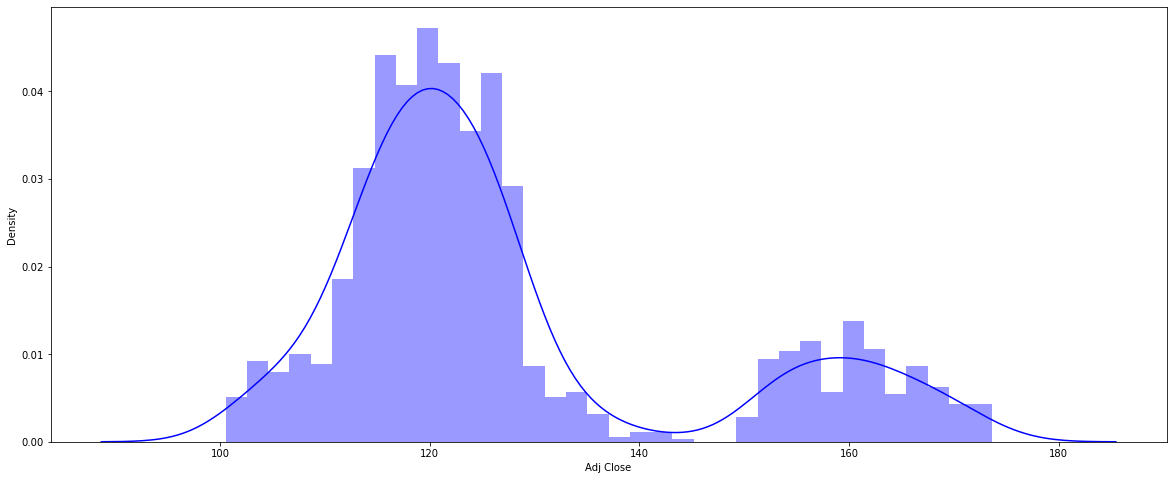

In [11]:
plt.figure(figsize=(20,8))
sns.distplot(df["Adj Close"], color='blue')

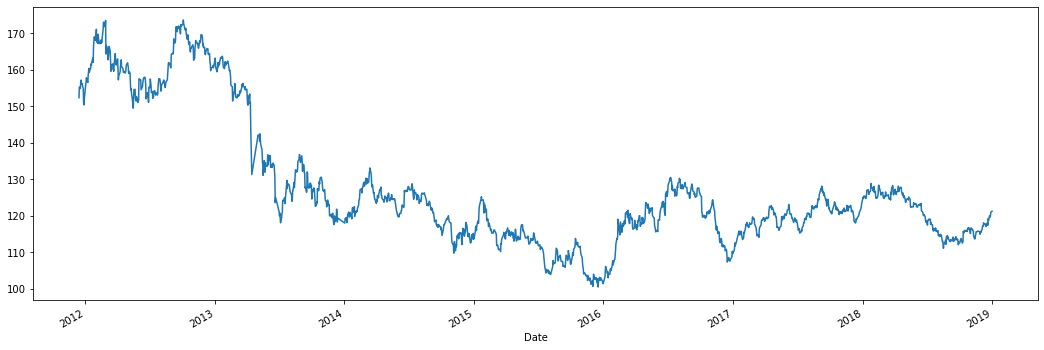

In [12]:
plt.figure(figsize=(18, 6))
df['Adj Close'].plot()
plt.show()

Entre le début de l'année 2012 et la fin de la même année, le cout de l'or fluctue autour d'une moyenne plus ou moins ascendante. 
Entre la fin de l'année 2012 et la moitié de l'année 2013, Notre variable cible semble suivre une tendance baissière qui tend à être stationnaire à partir de l'année 2014 jusqu'en 2019.

# Compréhension des différentes variables

In [13]:
Or = ['Open', 'High','Low', 'Close', 'Adj Close', 'Volume']
sp = ['SP_open','SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume' ]
dj = ['DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume']
eg = ['EG_open','EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume']
eu = ['EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend']
of = ['OF_Price', 'OF_Open','OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend']
os = ['OS_Price', 'OS_Open','OS_High', 'OS_Low', 'OS_Trend']
sf = ['SF_Price', 'SF_Open', 'SF_High','SF_Low', 'SF_Volume', 'SF_Trend']
usb = ['USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend']
plt = ['PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend']
pld = ['PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend','RHO_PRICE']
usdi = ['USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend']
gdx = ['GDX_Open', 'GDX_High','GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume']
uso = ['USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']
list_var = [Or,sp,dj,eg,eu,of,os,sf,usb,plt,pld,usdi,gdx,uso]
# list_var

Les variables sont regroupées par types de l'indice S&P 500 à l'ETF pétrolier USO.

In [15]:
for col in list_var:
    plt.figure(figsize=(8,8))
    correlation = df[col].corr()
    sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size":8}, cmap="Blues")

AttributeError: 'list' object has no attribute 'figure'

In [ ]:
for var in list_var:
    df[var].plot(subplots=True, figsize=(12, 8))
    

En déhors des volumes qui n'évoluent de la même manière que les taux, l'évolution des taux est sensiblement la même dans chaque groupe. 
Ainsi donc étudier on pourrait penser que l'impact d'un taux sur la variable cible pour chaque groupe est representatif du groupe.

### g. Visualisation des relations : features/target

In [ ]:
r_df = ['Adj Close','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_high','OF_High','OS_High','SF_High','USB_High','PLT_High','PLD_High','USDI_High','GDX_Adj Close','USO_Adj Close']
r_df

In [ ]:
correlation = df[r_df].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size":8}, cmap="Blues")

In [ ]:
for col in df.columns:
    plt.figure(figsize=(12,6))
    df[['Adj Close',col]].plot.line(subplots=True, figsize=(12, 6))
    plt.savefig(f'Adj_Close_{col}.png', dpi=200)
    plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
plt.title = "Correlation avec la variable cible"
df.corrwith(df['Adj Close']).plot.bar(grid = True)

Le graphique ci-dessus nous permet d'établir ou pas une corrrélation entre la varibale cible et les différentes variables explicatives. içi, les volumes ont un corrélation relativement faibles avec la variable cible. Ainsi dans la suite de notre travail,nous ne travaillerons qu'avec les différents taux. Comme le confirme le graphe, un seul taux suffira pour mesurer l'impact de chaque groupe de sur la varible cible. Par conséquant le nombre de nos variables se réduit à 14 au lieu de 80.

### h. Identification des outliers

In [ ]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
for col in df.columns:
    print(df[col].quantile(.95))

### 2. Préduction du prix de l'or

#### a. Pre-processing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import learning_curve
import sklearn.metrics as metrics

from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [ ]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)

In [ ]:
def preprocessing(df):
    
#     df = encodage(df)
#     df = feature_engineering(df)
#     df = imputation(df)
    
    X = df.drop('Adj Close', axis =1)
    y = df['Adj Close']
    
    print(y.value_counts())
    
    return X, y

In [ ]:
X_train, y_train = preprocessing(trainset)

In [ ]:
X_test, y_test = preprocessing(testset)

In [ ]:
sgd = SGDClassifier()

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    
    print(f"Entraînement: {model.score(X_train, Y_train)}\nTest: {model.score(X_test, Y_test)}")
#     print(classification_report(Y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                               cv=4, train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(model, fontsize=24)
    plt.legend()

In [ ]:
evaluation(model)

In [ ]:
ridge.fit(X_train, Y_train)